In [31]:
import matplotlib.pyplot as plt
import numpy as np

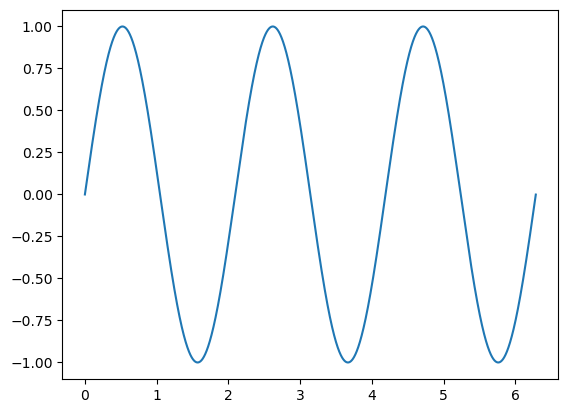

In [36]:
# sine wave
N = 1000
time = np.arange(start=0, stop=2*np.pi, step=1/N)
freq = 3
time_series = np.sin(freq * time)

plt.plot(time, time_series)

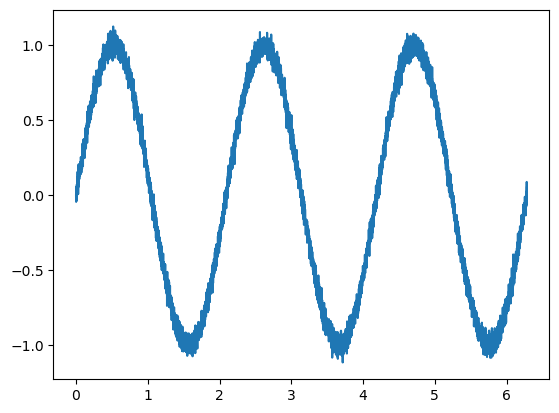

In [39]:
from tsaug import AddNoise

# add noise to full sequence
noise_augmentor = (
    AddNoise(scale=(0.01, 0.05)) @ 0.5  # 1% - 5% noise with 50% prob
)
plt.plot(time, noise_augmentor.augment(time_series))

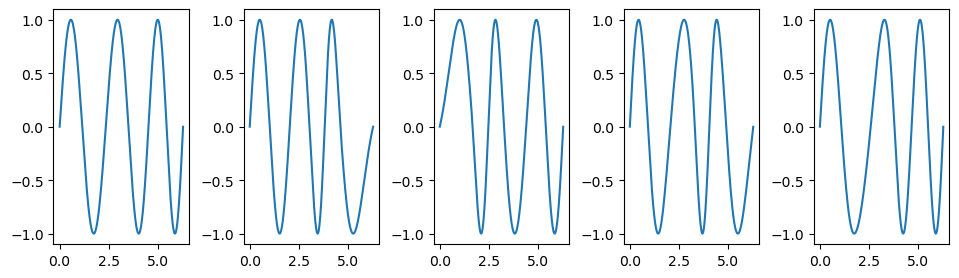

In [76]:
from tsaug import TimeWarp

m = 5
# add time warp
timeWarp_augmentor = (
        TimeWarp(max_speed_ratio=(1.1, 3.0)) * m # time warp m times
)
time_series_augm = timeWarp_augmentor.augment(time_series)

plt.subplots_adjust(left=0.1,
                    bottom=0.01,
                    right=1.5,
                    top=0.5,
                    wspace=0.4,
                    hspace=0.4)
for i in range(m):
    plt.subplot(1, m, i + 1)
    plt.plot(time, time_series_augm[i])

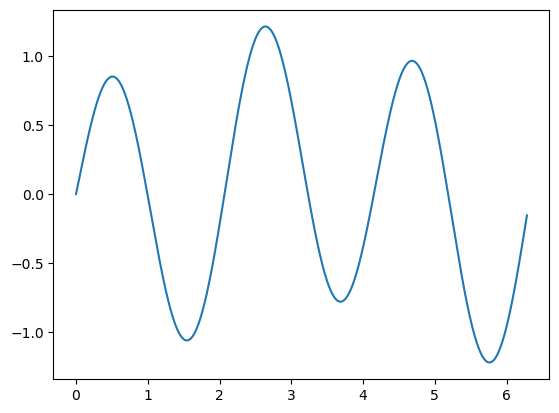

In [60]:
from tsaug import Drift

m = 5
# add magnitude warp
magWarp_augmentor = (
        Drift(max_drift=(0.1, 0.3)) @ 0.5 # 10% - 30% drift with 50% prob
)
plt.plot(time, magWarp_augmentor.augment(time_series))

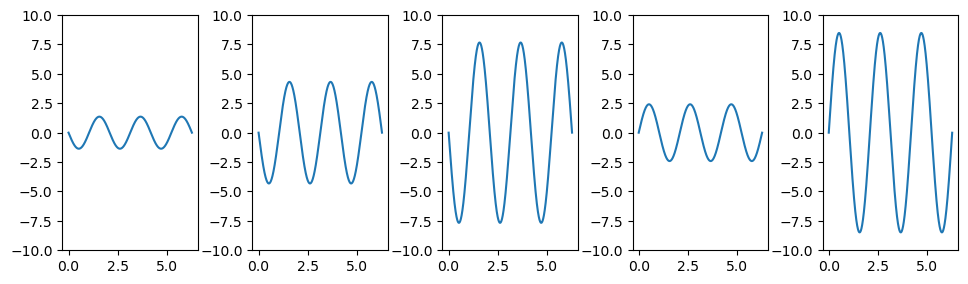

In [62]:
# scaling not in tsaug
m = 5

plt.subplots_adjust(left=0.1,
                    bottom=0.01,
                    right=1.5,
                    top=0.5,
                    wspace=0.4,
                    hspace=0.4)
for i in range(m):
    randomScale = np.random.normal(0, 5, 1)
    plt.subplot(1, m, i + 1)
    plt.plot(time, randomScale * time_series)
    plt.ylim(-10, 10)

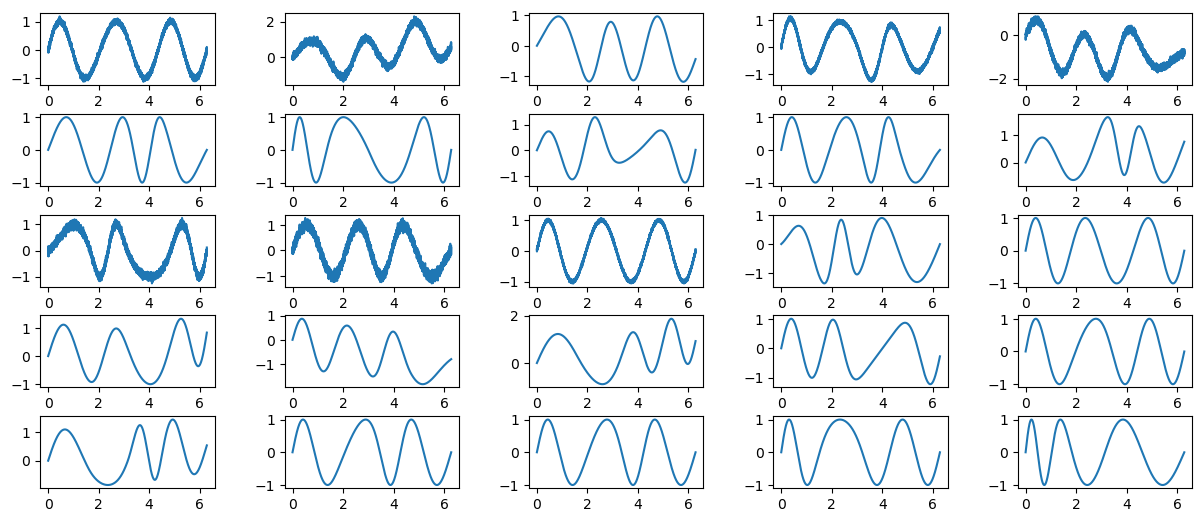

In [79]:
# put together (without scaling)
m = 25
augmentor = (
    TimeWarp(max_speed_ratio=(1.1, 3.0)) * m # time warp m times
    + AddNoise(scale=(0.01, 0.05)) @ 0.5  # 1% - 5% noise with 50% prob
    + Drift(max_drift=(0.1, 0.5)) @ 0.5 # 10% - 30% drift with 50% prob
)
time_series_augm = augmentor.augment(time_series)

plt.subplots_adjust(left=0.1,
                    bottom=0.01,
                    right=1.9,
                    top=1.0,
                    wspace=0.4,
                    hspace=0.4)
for i in range(m):
    randomScale = np.random.normal(0, 5, 1)
    plt.subplot(np.ceil(m**0.5).astype(int), np.ceil(m**0.5).astype(int), i + 1)
    plt.plot(time, time_series_augm[i])